<a href="https://colab.research.google.com/github/trisharaj11/Climate_Impact_on_Crop_Productivity/blob/main/03_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
# Load dataset
data = pd.read_csv('merged_data_2010_2017.csv')

# Load trained models
wheat_model = joblib.load('wheat_model.pkl')
rice_model = joblib.load('rice_model.pkl')
scaler = joblib.load('scaler.pkl')

data.head()


,State Name,Year,Crop,Yield,Rainfall,Temperature
0,Chhattisgarh,2010,Rice,1695.77,1215.5,25.13
1,Chhattisgarh,2011,Rice,1756.23,1116.3,24.67
2,Chhattisgarh,2012,Rice,1900.97,1054.7,24.69
3,Chhattisgarh,2013,Rice,1581.86,1092.5,24.82
4,Chhattisgarh,2014,Rice,1729.89,1045.2,24.73


In [3]:
FEATURES = ['Temperature', 'Rainfall']
TARGET = 'Yield'

wheat_data = data[data['Crop'] == 'Wheat']
rice_data = data[data['Crop'] == 'Rice']


In [4]:
Xw = wheat_data[FEATURES]
yw = wheat_data[TARGET]

Xr = rice_data[FEATURES]
yr = rice_data[TARGET]


In [5]:
wheat_preds = wheat_model.predict(Xw)
rice_preds = rice_model.predict(Xr)


In [6]:
def evaluate_model(y_true, y_pred, crop):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{crop} RMSE:", rmse)
    print(f"{crop} R² Score:", r2)


In [7]:
print("Model Evaluation Results")
evaluate_model(yw, wheat_preds, "Wheat")
evaluate_model(yr, rice_preds, "Rice")


Model Evaluation Results
Wheat RMSE: 1350.6488023500822
Wheat R² Score: 0.011276331596512756
Rice RMSE: 1116.3917949153188
Rice R² Score: 0.010331658957672851


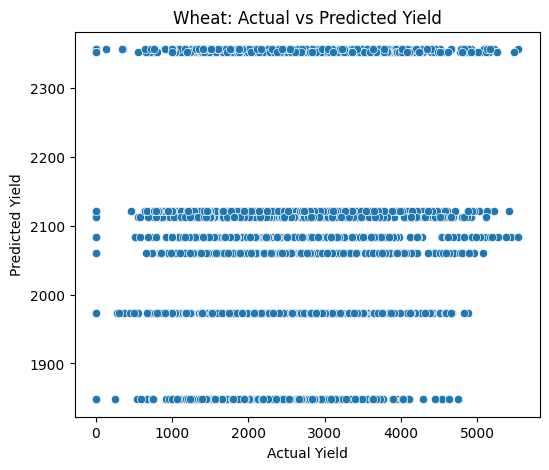

In [8]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=yw, y=wheat_preds)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Wheat: Actual vs Predicted Yield")
plt.show()


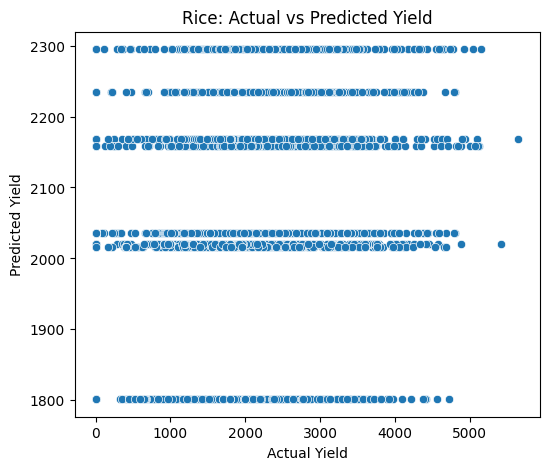

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=yr, y=rice_preds)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Rice: Actual vs Predicted Yield")
plt.show()


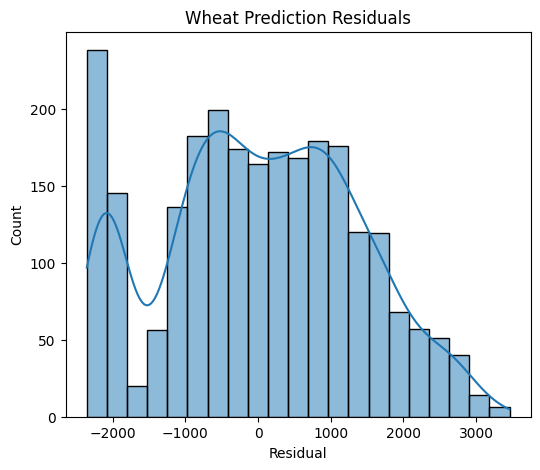

In [10]:
wheat_residuals = yw - wheat_preds

plt.figure(figsize=(6,5))
sns.histplot(wheat_residuals, kde=True)
plt.title("Wheat Prediction Residuals")
plt.xlabel("Residual")
plt.show()


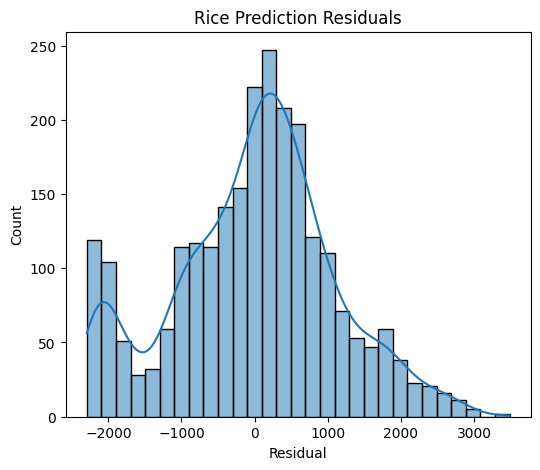

In [11]:
rice_residuals = yr - rice_preds

plt.figure(figsize=(6,5))
sns.histplot(rice_residuals, kde=True)
plt.title("Rice Prediction Residuals")
plt.xlabel("Residual")
plt.show()


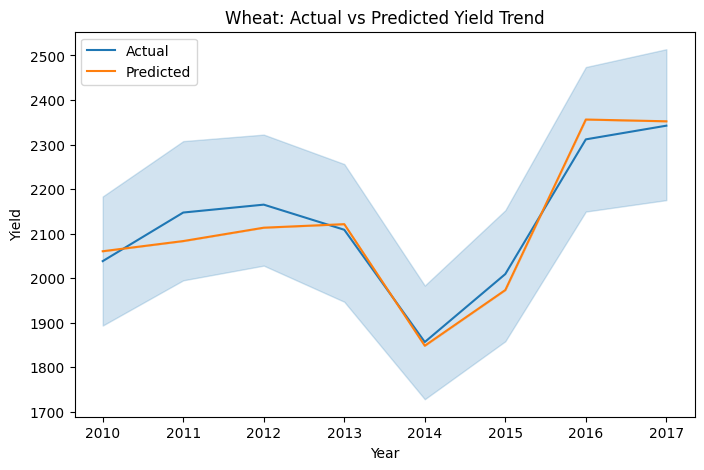

In [12]:
wheat_plot = wheat_data.copy()
wheat_plot['Predicted_Yield'] = wheat_preds

plt.figure(figsize=(8,5))
sns.lineplot(data=wheat_plot, x='Year', y='Yield', label='Actual')
sns.lineplot(data=wheat_plot, x='Year', y='Predicted_Yield', label='Predicted')
plt.title("Wheat: Actual vs Predicted Yield Trend")
plt.show()


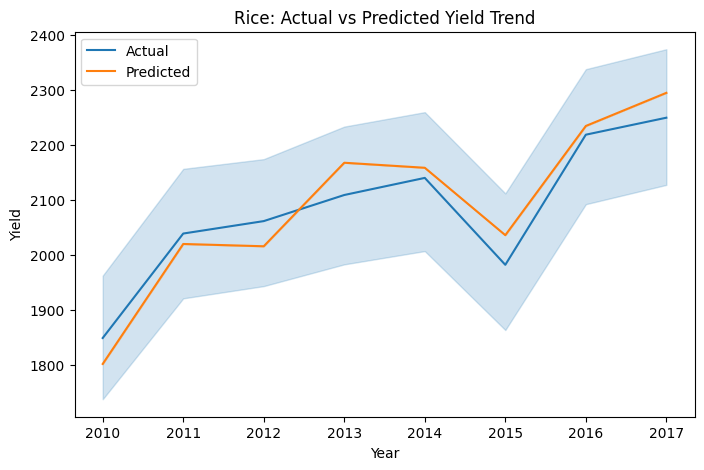

In [13]:
rice_plot = rice_data.copy()
rice_plot['Predicted_Yield'] = rice_preds

plt.figure(figsize=(8,5))
sns.lineplot(data=rice_plot, x='Year', y='Yield', label='Actual')
sns.lineplot(data=rice_plot, x='Year', y='Predicted_Yield', label='Predicted')
plt.title("Rice: Actual vs Predicted Yield Trend")
plt.show()
